### Confuguring the model

In [1]:
from langchain_google_genai import ChatGoogleGenerativeAI
model = ChatGoogleGenerativeAI(model="gemini-1.5-flash")
output = model.invoke("Hi")
output = output.content
print(output)
# so LLM - google model is working

Hi there! How can I help you today?


### configuring the embedding model


In [2]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="BAAI/bge-small-en")
output = len(embeddings.embed_query("Hi"))
print(output)

d:\agenticbatch2\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


384


### Create a Vector Database - take a embedd it and store in vector dayttbase - need documentLoder,Vector db(croma) and then split into the chunck

In [3]:
from langchain_community.document_loaders import TextLoader,DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [4]:
loader = DirectoryLoader(
    "../data2",
    glob="**/*.txt",
    show_progress=True,
    loader_cls=TextLoader
)
docs = loader.load()
docs[0].page_content

100%|██████████| 1/1 [00:00<00:00, 497.54it/s]


"ðŸ‡ºðŸ‡¸ Overview of the U.S. Economy\nThe United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services. It has a highly diversified structure with strong sectors in technology, healthcare, finance, real estate, defense, and agriculture.\n\nU.S. GDP â€“ Size, Composition, and Global Share\nAs of 2024, the United Statesâ€™ nominal GDP is estimated to be around $28 trillion USD, accounting for approximately 25% of the global economy. It ranks #1 in the world by nominal GDP, far ahead of China (which ranks 2nd). The U.S. GDP per capita is also among the high

In [5]:
text_spitter = RecursiveCharacterTextSplitter(
    chunk_size=200,
    chunk_overlap=50
)

In [6]:
new_docs = text_spitter.split_documents(documents=docs)

In [7]:
doc_string = [documents.page_content for documents in new_docs]

#numbers = [1, 2, 3, 4, 5]List comprehension in Python
#squared = [num ** 2 for num in numbers]
#print(squared)  # Output: [1, 4, 9, 16, 25]
# done 


In [36]:
len(doc_string)
# 55 file chinc are there

56

In [27]:
#pip install chromadb

In [8]:
db=Chroma.from_documents(new_docs,embeddings)# store data inside a crome 

In [9]:
retereiverdb = db.as_retriever(search_kwargs={"k": 3})# reteiver from db

In [10]:
retereiverdb.invoke("Industrial growth of USA")

[Document(metadata={'source': '..\\data2\\usa.txt'}, page_content='ðŸ‡ºðŸ‡¸ Overview of the U.S. Economy'),
 Document(metadata={'source': '..\\data2\\usa.txt'}, page_content='Looking forward, the U.S. economy is expected to grow at a moderate pace, powered by innovation in AI, green energy, robotics, biotech, and quantum computing. The Biden administrationâ€™s Inflation'),
 Document(metadata={'source': '..\\data2\\usa.txt'}, page_content='The U.S. economy remains the engine of global growth, backed by unmatched innovation, financial dominance, and a strong institutional framework. Its $28 trillion GDP and influence over global')]

#### Langgrapg workflow creation  - creation of Pydentoic class 

In [11]:
import operator
from typing import List
from pydantic import BaseModel , Field
from langchain.prompts import PromptTemplate
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import PydanticOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,START,END
import operator



In [12]:
class TopicSelectionParser(BaseModel):
    Topic: str = Field(description="The topic selected by the user")
    Reasoning: str = Field(description="The reasoning behind the topic selection")

In [13]:
PydanticOutputParser = PydanticOutputParser(pydantic_object=TopicSelectionParser)

In [14]:
PydanticOutputParser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "The topic selected by the user", "title": "Topic", "type": "string"}, "Reasoning": {"description": "The reasoning behind the topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}\n```'

In [ ]:
'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "The topic selected by the user", "title": "Topic", "type": "string"}, "Reasoning": {"description": "The reasoning behind the topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}\n```'

In [15]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage],operator.add]

### Explaing the above code
### Dictionary -AgentState={}, inside dic created one key messages as AgentState["messages"] and assihn messige list =[]
### AgentState["messages"]=[]
### AgentState["messages"].append(message)
### AgentState["messages"] = AgentState["messages"] + [message]
### AgentState["messages"] += [message]
### 

In [ ]:
AgentState["BaseMessage"]

__main__.AgentState['BaseMessage']

In [16]:
def functtion_1(state:AgentState) -> AgentState:
   pass

In [17]:
def functtion_2(state:AgentState) -> AgentState:
    pass

In [18]:
def functtion_3(state:AgentState) -> AgentState:
    pass

In [19]:
def router(state:AgentState):
    pass

In [20]:
### State graph
workflow = StateGraph(AgentState)

In [21]:
workflow.add_node("Supervisor",functtion_1)

In [22]:
workflow.add_node("RAG",functtion_2)

In [23]:
workflow.add_node("LLM",functtion_3)

In [24]:
workflow.set_entry_point("Supervisor")

In [25]:
workflow.add_conditional_edges(
    "Supervisor",
    router,
    {
        "RAG": "RAG",
        "LLM": "LLM"
    }
)

In [26]:
workflow.add_edge("RAG",END)
workflow.add_edge("LLM",END)

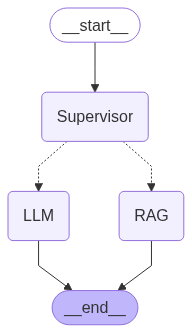

In [27]:
workflow.compile()